In [1]:
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:

dataset = pd.read_csv('output.csv')

In [3]:
dataset.shape

(10020, 2)

In [4]:
dataset.head()

,Rating,Comment
0,1.0,Alexa cannot hear after she starts playing
1,3.0,I purchased this as a birthday gift for my 7 y...
2,1.0,"/*Here I'm Uploading video, enjoy*/Most idioti..."
3,5.0,Its just one if the best deal i ever got on am...
4,1.0,Do not buy this product. When i asked alexa th...


In [5]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kanishk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
corpus=[]

for i in range(0, dataset.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', str(dataset['Comment'][i]))
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [8]:
def sentiment(n):
    return 1 if n >= 4 else 0
dataset['sentiment'] = dataset['Rating'].apply(sentiment)
dataset.head()


,Rating,Comment,sentiment
0,1.0,Alexa cannot hear after she starts playing,0
1,3.0,I purchased this as a birthday gift for my 7 y...,0
2,1.0,"/*Here I'm Uploading video, enjoy*/Most idioti...",0
3,5.0,Its just one if the best deal i ever got on am...,1
4,1.0,Do not buy this product. When i asked alexa th...,0


In [9]:
X = cv.fit_transform(corpus).toarray()
#y = dataset.iloc[:, -1].values
y = dataset['sentiment']
#y = dataset.iloc[:, 0].values
y



0        0
1        0
2        0
3        1
4        0
        ..
10015    1
10016    1
10017    0
10018    1
10019    1
Name: sentiment, Length: 10020, dtype: int64

In [10]:
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))



In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)

In [13]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
y_train

1712    1
5421    1
3910    0
1578    1
5470    1
       ..
9225    1
4859    1
3264    1
9845    0
2732    0
Name: sentiment, Length: 8016, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000 )
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [16]:
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

['c2_Classifier_Sentiment_Model']

In [17]:
y_pred = classifier.predict(X_test)

#cm

accuracy_score(y_test, y_pred)

0.8672654690618763

In [18]:
y_test

8137    1
5929    1
5097    0
7761    1
4804    1
       ..
1255    0
6900    0
5228    1
7024    0
7974    1
Name: sentiment, Length: 2004, dtype: int64

In [19]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

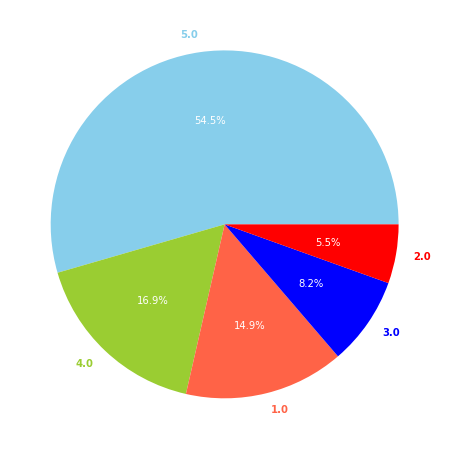

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
ratings = dataset["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
patches, texts, pcts = plt.pie(quantity, labels=numbers, colors=custom_colors, autopct='%1.1f%%' )
# central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)


# fig.gca().add_artist(central_circle)
plt.rc('font', size=19)
# plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.savefig('pie.png',transparent=True)

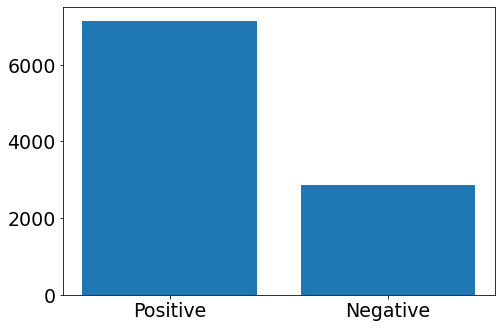

In [21]:
p=0
ne=0
def get_polar(n):
    if (dataset['Rating'][n] >= 4) :
        return 1       

for i in range(len(dataset)-1):
    if(get_polar(i)==1):
        p+=1
    else:
        ne+=1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positive', 'Negative']
students = [p,ne]
ax.bar(langs,students)
plt.show()

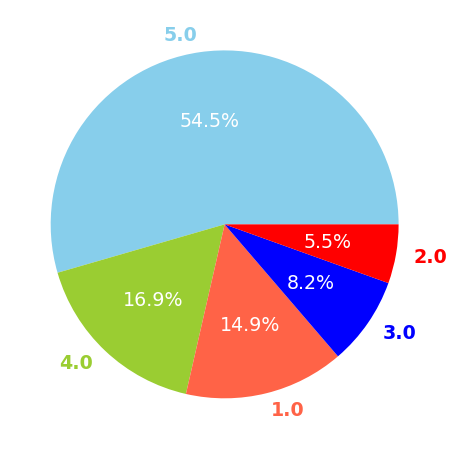

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
ratings = dataset["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
patches, texts, pcts = plt.pie(quantity, labels=numbers, colors=custom_colors, autopct='%1.1f%%' )
# central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)


# fig.gca().add_artist(central_circle)
plt.rc('font', size=19)
# plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.savefig('pie.png',transparent=True)

<BarContainer object of 5 artists>

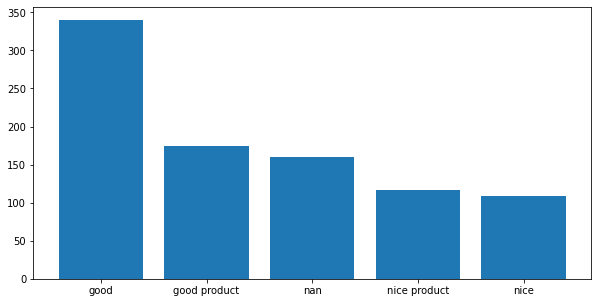

In [23]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

df=pd.DataFrame({tuple(corpus)})

df = df.dropna()

df = df.reset_index(drop=True)
df_stack=df.stack(level=0) 

counter=df_stack.value_counts()[0:5] # set top 10: df_stack.value_counts()[0:10]
plt.bar(counter.index,counter.values)